### Import the Required Libaries

In [1]:
#Importing Required Libaries
import cv2
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import keras
from keras.models import Sequential, Model,load_model
from tensorflow.keras.optimizers import SGD
from keras.callbacks import EarlyStopping,ModelCheckpoint
from google.colab.patches import cv2_imshow
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.preprocessing import image
from keras.initializers import glorot_uniform

### Set the SEED value

In [2]:
#Run This to set the seed values for the models.
import random
import tensorflow as tf

def seed_everything(seed):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    
SEED = 42
seed_everything(SEED)

### Display files present in the directories

In [3]:
train_path="/content/drive/MyDrive/Colab Notebooks/DeepL-Birds/Train" #The path for training data
test_path="/content/drive/MyDrive/Colab Notebooks/DeepL-Birds/Test" #The path for testing data which was withheld before training
class_names=os.listdir(train_path)
class_names_test=os.listdir(test_path)
print(class_names)
print(class_names_test)
dir = os.listdir('/content/drive/MyDrive/Colab Notebooks/DeepL-Birds/Test') #the directory for test data
print(dir)
file_path = ('//content/drive/MyDrive/Colab Notebooks/DeepL-Birds/Test')
print(file_path)
#os.rmdir('/content/drive/MyDrive/Colab Notebooks/DL-Project/Test/.ipynb_checkpoints')
print(dir)
dir = os.listdir('/content/drive/MyDrive/Colab Notebooks/DeepL-Birds/Train')#the directory for test data
print(dir)
file_path = ('/content/drive/MyDrive/Colab Notebooks/DeepL-Birds/Train')
print(file_path)
#os.rmdir('/content/drive/MyDrive/DL- Project/train/.ipynb_checkpoints')
print(dir)

['American_Goldfinch', 'Barn_Swallow', 'Cedar_Waxwing', 'Fish_Crow', 'White_Pelican', 'Gray_Kingbird', 'Tree_Swallow', 'Cardinal', 'Western_Meadowlark', 'White_breasted_Kingfisher']
['American_Goldfinch', 'Barn_Swallow', 'Cedar_Waxwing', 'Fish_Crow', 'Gray_Kingbird', 'White_Pelican', 'Tree_Swallow', 'Cardinal', 'Western_Meadowlark', 'White_breasted_Kingfisher']
['American_Goldfinch', 'Barn_Swallow', 'Cedar_Waxwing', 'Fish_Crow', 'Gray_Kingbird', 'White_Pelican', 'Tree_Swallow', 'Cardinal', 'Western_Meadowlark', 'White_breasted_Kingfisher']
//content/drive/MyDrive/Colab Notebooks/DeepL-Birds/Test
['American_Goldfinch', 'Barn_Swallow', 'Cedar_Waxwing', 'Fish_Crow', 'Gray_Kingbird', 'White_Pelican', 'Tree_Swallow', 'Cardinal', 'Western_Meadowlark', 'White_breasted_Kingfisher']
['American_Goldfinch', 'Barn_Swallow', 'Cedar_Waxwing', 'Fish_Crow', 'White_Pelican', 'Gray_Kingbird', 'Tree_Swallow', 'Cardinal', 'Western_Meadowlark', 'White_breasted_Kingfisher']
/content/drive/MyDrive/Colab Note

### Display Sample Data

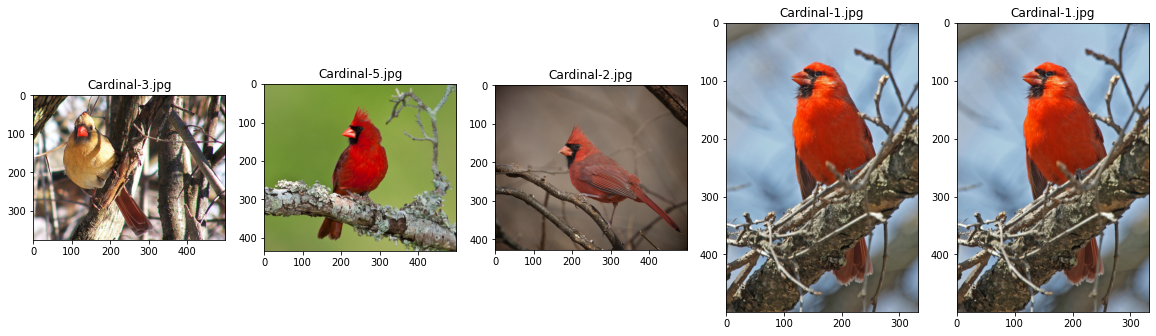

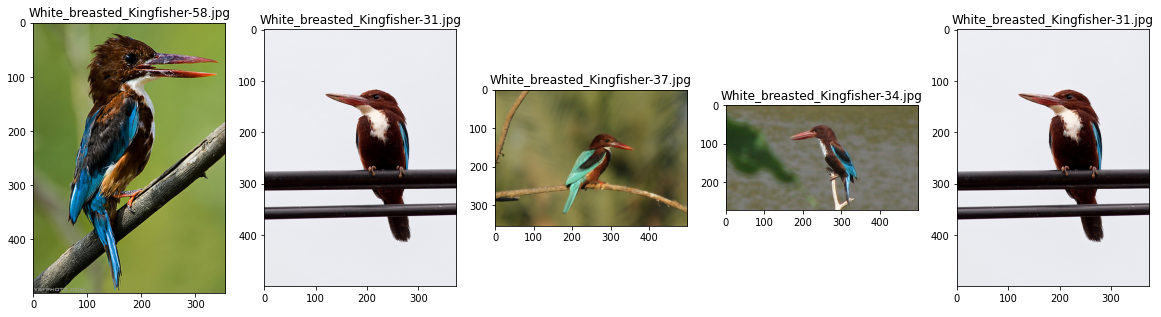

In [4]:
#displaying 

from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
import random

# First folder codes
plt.figure(figsize=(20,20))
test_folder=r'/content/drive/MyDrive/Colab Notebooks/DeepL-Birds/Test'
img_folder="/content/drive/MyDrive/Colab Notebooks/DeepL-Birds/Test/Cardinal"
#os.rmdir('/content/drive/MyDrive/test/test1/.ipynb_checkpoints')
for i in range(5):
    file = random.choice(os.listdir("/content/drive/MyDrive/Colab Notebooks/DeepL-Birds/Test/Cardinal"))
    image_path= os.path.join(img_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

# second folder codes
img_folder="/content/drive/MyDrive/Colab Notebooks/DeepL-Birds/Train/White_breasted_Kingfisher"
#os.rmdir('/content/drive/MyDrive/test/test2/.ipynb_checkpoints')
plt.figure(figsize=(20,20))
for i in range(5):
    file = random.choice(os.listdir("/content/drive/MyDrive/Colab Notebooks/DeepL-Birds/Train/White_breasted_Kingfisher"))
    image_path= os.path.join(img_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

### Generate the train and test data




In [5]:
#Run this to generate the train and test data
# Give the correct directory name to load the data to train and test generator
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.1,width_shift_range=0.1,height_shift_range=0.1,shear_range=0.1,rotation_range=5,brightness_range=(0,0.5),horizontal_flip=True,vertical_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)


# Give the correct directory name to load the data to train and test generator
train_generator = train_datagen.flow_from_directory("/content/drive/MyDrive/Colab Notebooks/DeepL-Birds/Train",target_size=(224, 224),batch_size=32,shuffle=True,class_mode='categorical')
test_generator = test_datagen.flow_from_directory("/content/drive/MyDrive/Colab Notebooks/DeepL-Birds/Test",target_size=(224,224),batch_size=32,shuffle=False,class_mode='categorical')

Found 506 images belonging to 10 classes.
Found 100 images belonging to 10 classes.


### Identity Block Function Defenition for ResNet-50
##### Run this Block for ResNet Baseline

In [6]:
def identity_block(X, f, filters, stage, block):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters

    X_shortcut = X
   
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2a',kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b',kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c',kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X = Add()([X, X_shortcut])# SKIP Connection
    X = Activation('relu')(X)

    return X

### Convolution Block for Defenition for ResNet-50
##### Run this Block for ResNet Baseline

In [7]:
def convolutional_block(X, f, filters, stage, block, s=2):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '2a',kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b',kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c',kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1',kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

### Resnet50 Function Defention to Combine the Identity and Convolution layers
#### Run this block for the to bulit the ResNet Definition




In [8]:
def ResNet50(input_shape=(224, 224, 3)):

    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)

    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', )(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')


    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    X = X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)
    
    model = Model(inputs=X_input, outputs=X, name='ResNet50')

    return model

### Build The ResNet Model 
#### Run This block to build the model

In [9]:
base_model = ResNet50(input_shape=(224, 224, 3))


headModel = base_model.output
headModel = Flatten()(headModel)
headModel=Dense(256, activation='relu', name='fc1',)(headModel)
headModel=Dense(128, activation='relu', name='fc2',)(headModel)
headModel = Dense(10,activation='sigmoid', name='fc3',)(headModel)

model = Model(inputs=base_model.input, outputs=headModel)

import matplotlib.pyplot as plt
model.compile(loss='categorical_crossentropy', optimizer='RMSProp', metrics=['accuracy'])
history = model.fit(train_generator, verbose=1, validation_data = test_generator, epochs=200)


Epoch 1/200
16/16 [==============================] - 249s 14s/step - loss: 19.4295 - accuracy: 0.1067 - val_loss: 2.3264 - val_accuracy: 0.1000
Epoch 2/200
16/16 [==============================] - 9s 555ms/step - loss: 3.7528 - accuracy: 0.1126 - val_loss: 2.3180 - val_accuracy: 0.1000
Epoch 3/200
16/16 [==============================] - 9s 551ms/step - loss: 3.2384 - accuracy: 0.0968 - val_loss: 2.3108 - val_accuracy: 0.1000
Epoch 4/200
16/16 [==============================] - 9s 555ms/step - loss: 3.1524 - accuracy: 0.1285 - val_loss: 901.4299 - val_accuracy: 0.1000
Epoch 5/200
16/16 [==============================] - 9s 555ms/step - loss: 3.1999 - accuracy: 0.1067 - val_loss: 8.3375 - val_accuracy: 0.1000
Epoch 6/200
16/16 [==============================] - 9s 555ms/step - loss: 2.4644 - accuracy: 0.1126 - val_loss: 2.3211 - val_accuracy: 0.1300
Epoch 7/200
16/16 [==============================] - 9s 550ms/step - loss: 2.3695 - accuracy: 0.0632 - val_loss: 2.3174 - val_accuracy: 0.0

### Run This To see the Model Summary

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1 (Conv2D)                 (None, 112, 112, 64  9472        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

### This Code would give the graphs for Training Accuracy vs Validation Accuracy
### and Training Loss vs Validation Loss

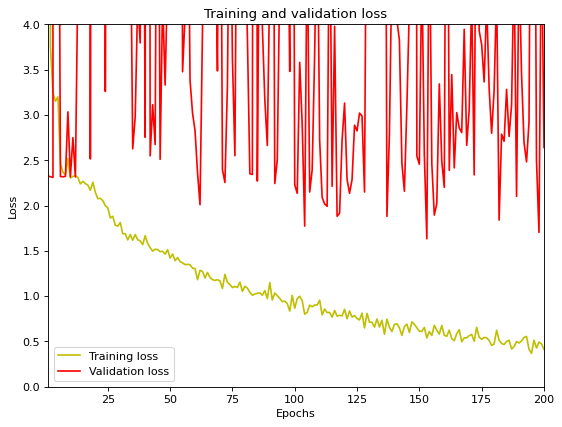

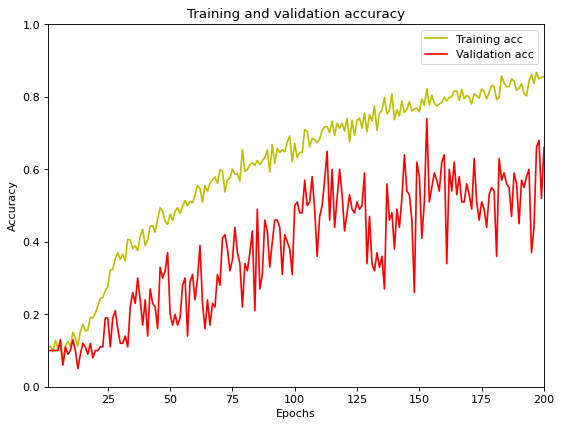

[0.10671936720609665, 0.11264821887016296, 0.09683794528245926, 0.12845849990844727, 0.10671936720609665, 0.11264821887016296, 0.06324110925197601, 0.11264821887016296, 0.12450592964887619, 0.11067193746566772, 0.15019762516021729, 0.13438735902309418, 0.11264821887016296, 0.15217390656471252, 0.1719367653131485, 0.15415020287036896, 0.1561264842748642, 0.19169960916042328, 0.18972331285476685, 0.2035573124885559, 0.2233201563358307, 0.24308300018310547, 0.24703557789325714, 0.2648221254348755, 0.2766798436641693, 0.3221343755722046, 0.3241106867790222, 0.3537549376487732, 0.3695652186870575, 0.35177865624427795, 0.365612655878067, 0.3478260934352875, 0.4071146249771118, 0.4051383435726166, 0.3814229369163513, 0.3893280625343323, 0.3754940629005432, 0.4150197505950928, 0.43478259444236755, 0.3893280625343323, 0.4051383435726166, 0.4426877498626709, 0.44466403126716614, 0.4268774688243866, 0.4624505937099457, 0.4940711557865143, 0.4841897189617157, 0.45652174949645996, 0.448616594076156

In [11]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlim(1,200)
plt.ylim(0,4)
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
figure(figsize=(8, 6), dpi=80)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.xlim(1,200)
plt.ylim(0,1)
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print(acc)

### This code would provide the Evaluvation Meterics for ResNet Model
### The Confusion Matrix is displayed at the End

In [12]:
import numpy as np
import sklearn.metrics as metrics
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
predictions = model.predict(test_generator,test_steps_per_epoch)
# Get most likely class
predictions = np.argmax(predictions, axis=-1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())
report = metrics.classification_report(true_classes, predictions, target_names=class_labels)
print(report)
confusion_matrix = metrics.confusion_matrix(true_classes, predictions)  # shape=(12, 12)
print(confusion_matrix)

                           precision    recall  f1-score   support

       American_Goldfinch       0.71      1.00      0.83        10
             Barn_Swallow       0.50      0.50      0.50        10
                 Cardinal       0.91      1.00      0.95        10
            Cedar_Waxwing       0.56      0.50      0.53        10
                Fish_Crow       0.56      0.50      0.53        10
            Gray_Kingbird       0.43      0.30      0.35        10
             Tree_Swallow       0.67      0.40      0.50        10
       Western_Meadowlark       0.83      0.50      0.62        10
            White_Pelican       0.59      1.00      0.74        10
White_breasted_Kingfisher       0.82      0.90      0.86        10

                 accuracy                           0.66       100
                macro avg       0.66      0.66      0.64       100
             weighted avg       0.66      0.66      0.64       100

[[10  0  0  0  0  0  0  0  0  0]
 [ 0  5  0  2  0  1  0  0 

### Run the Following Cells for the Model Prediction Experimentation
### Experiment - 1

['American_Goldfinch', 'Barn_Swallow', 'Cardinal', 'Cedar_Waxwing', 'Fish_Crow', 'Gray_Kingbird', 'Tree_Swallow', 'Western_Meadowlark', 'White_Pelican', 'White_breasted_Kingfisher']
American_Goldfinch (0.682)
Western_Meadowlark (6.52e-05)
Tree_Swallow (3.69e-05)
Cedar_Waxwing (1.65e-06)
Gray_Kingbird (1.21e-07)
White_breasted_Kingfisher (6.17e-08)
Barn_Swallow (4.77e-09)
Fish_Crow (3.05e-09)
Cardinal (4.46e-10)
White_Pelican (1.19e-10)


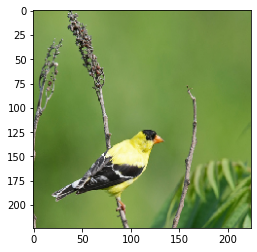

In [13]:
img = image.load_img('/content/drive/MyDrive/Colab Notebooks/DeepL-Birds/Test/American_Goldfinch/American_GoldfinchTest-1.jpg',target_size=(224,224,3))
img = image.img_to_array(img)
img = img/255

classes = class_labels
print(classes)
proba = model.predict(img.reshape(1,224,224,3))
top_10 = np.argsort(proba[0])[:-11:-1]
for i in range(10):
    print("{}".format(classes[top_10[i]])+" ({:.3})".format(proba[0][top_10[i]]))
plt.imshow(img)

### Experiment - 2

['American_Goldfinch', 'Barn_Swallow', 'Cardinal', 'Cedar_Waxwing', 'Fish_Crow', 'Gray_Kingbird', 'Tree_Swallow', 'Western_Meadowlark', 'White_Pelican', 'White_breasted_Kingfisher']
Cardinal (0.999)
Cedar_Waxwing (0.000368)
White_breasted_Kingfisher (5.09e-05)
Barn_Swallow (3.3e-05)
White_Pelican (1.3e-07)
American_Goldfinch (9.64e-11)
Gray_Kingbird (2.36e-12)
Tree_Swallow (1.75e-12)
Western_Meadowlark (4.46e-13)
Fish_Crow (1.72e-22)


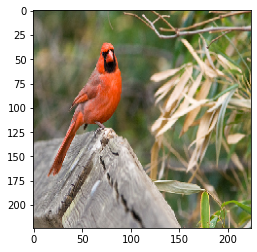

In [14]:
img = image.load_img('/content/drive/MyDrive/Colab Notebooks/DeepL-Birds/Test/Cardinal/Cardinal-4.jpg',target_size=(224,224,3))
img = image.img_to_array(img)
img = img/255

classes = class_labels
print(classes)
proba = model.predict(img.reshape(1,224,224,3))
top_10 = np.argsort(proba[0])[:-11:-1]
for i in range(10):
    print("{}".format(classes[top_10[i]])+" ({:.3})".format(proba[0][top_10[i]]))
plt.imshow(img)

### Experiment - 3

['American_Goldfinch', 'Barn_Swallow', 'Cardinal', 'Cedar_Waxwing', 'Fish_Crow', 'Gray_Kingbird', 'Tree_Swallow', 'Western_Meadowlark', 'White_Pelican', 'White_breasted_Kingfisher']
Gray_Kingbird (0.322)
Cedar_Waxwing (0.073)
Western_Meadowlark (0.000804)
Barn_Swallow (7.85e-05)
Tree_Swallow (1.87e-05)
White_Pelican (5.39e-06)
American_Goldfinch (1.65e-06)
White_breasted_Kingfisher (1.1e-06)
Cardinal (2.43e-07)
Fish_Crow (5.2e-08)


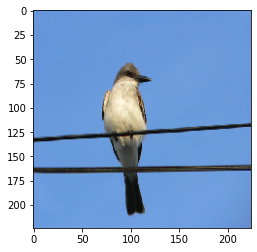

In [15]:
img = image.load_img('/content/drive/MyDrive/Colab Notebooks/DeepL-Birds/Test/Gray_Kingbird/Gray_Kingbird-2.jpg',target_size=(224,224,3))
img = image.img_to_array(img)
img = img/255

classes = class_labels
print(classes)
proba = model.predict(img.reshape(1,224,224,3))
top_10 = np.argsort(proba[0])[:-11:-1]
for i in range(10):
    print("{}".format(classes[top_10[i]])+" ({:.3})".format(proba[0][top_10[i]]))
plt.imshow(img)

### Import The Following Libaries for Attention Based ResNet

In [16]:
import numpy as np
import tensorflow as tf
import os
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Multiply,GlobalAveragePooling2D, Add, Dense, Activation, Flatten, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, Lambda
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
#import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model
#eras.utils import plot_model
#from resnets_utils import *
from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
import keras.backend as K

In [17]:
train_path="/content/drive/MyDrive/Colab Notebooks/DeepL-Birds/Train" #The path for training data
test_path="/content/drive/MyDrive/Colab Notebooks/DeepL-Birds/Test" #The path for testing data which was withheld before training
class_names=os.listdir(train_path)
class_names_test=os.listdir(test_path)
print(class_names)
print(class_names_test)
dir = os.listdir('/content/drive/MyDrive/Colab Notebooks/DeepL-Birds/Test') #the directory for test data
print(dir)
file_path = ('//content/drive/MyDrive/Colab Notebooks/DeepL-Birds/Test')
print(file_path)
#os.rmdir('/content/drive/MyDrive/Colab Notebooks/DL-Project/Test/.ipynb_checkpoints')
print(dir)
dir = os.listdir('/content/drive/MyDrive/Colab Notebooks/DeepL-Birds/Train')
print(dir)
file_path = ('/content/drive/MyDrive/Colab Notebooks/DeepL-Birds/Train')
print(file_path)
#os.rmdir('/content/drive/MyDrive/DL- Project/train/.ipynb_checkpoints')
print(dir)
dir = os.listdir('/content/drive/MyDrive/Colab Notebooks/DL/predict')
print(dir)
file_path = ('/content/drive/MyDrive/Colab Notebooks/DL/predict')
print(file_path)
#os.rmdir('/content/drive/MyDrive/Colab Notebooks/DL/predict/.ipynb_checkpoints')
print(dir)

['American_Goldfinch', 'Barn_Swallow', 'Cedar_Waxwing', 'Fish_Crow', 'White_Pelican', 'Gray_Kingbird', 'Tree_Swallow', 'Cardinal', 'Western_Meadowlark', 'White_breasted_Kingfisher']
['American_Goldfinch', 'Barn_Swallow', 'Cedar_Waxwing', 'Fish_Crow', 'Gray_Kingbird', 'White_Pelican', 'Tree_Swallow', 'Cardinal', 'Western_Meadowlark', 'White_breasted_Kingfisher']
['American_Goldfinch', 'Barn_Swallow', 'Cedar_Waxwing', 'Fish_Crow', 'Gray_Kingbird', 'White_Pelican', 'Tree_Swallow', 'Cardinal', 'Western_Meadowlark', 'White_breasted_Kingfisher']
//content/drive/MyDrive/Colab Notebooks/DeepL-Birds/Test
['American_Goldfinch', 'Barn_Swallow', 'Cedar_Waxwing', 'Fish_Crow', 'Gray_Kingbird', 'White_Pelican', 'Tree_Swallow', 'Cardinal', 'Western_Meadowlark', 'White_breasted_Kingfisher']
['American_Goldfinch', 'Barn_Swallow', 'Cedar_Waxwing', 'Fish_Crow', 'White_Pelican', 'Gray_Kingbird', 'Tree_Swallow', 'Cardinal', 'Western_Meadowlark', 'White_breasted_Kingfisher']
/content/drive/MyDrive/Colab Note

### Generate the train and test data

In [18]:
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.1,width_shift_range=0.1,height_shift_range=0.1,shear_range=0.1,rotation_range=5,brightness_range=(0,0.5),horizontal_flip=True,vertical_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory("/content/drive/MyDrive/Colab Notebooks/DeepL-Birds/Train",target_size=(224,224),color_mode='rgb',batch_size=32,shuffle=True,class_mode='categorical')
test_generator = test_datagen.flow_from_directory("/content/drive/MyDrive/Colab Notebooks/DeepL-Birds/Test",target_size=(224,224),color_mode='rgb',batch_size=32,shuffle=False,class_mode='categorical')


Found 506 images belonging to 10 classes.
Found 100 images belonging to 10 classes.


### Convolution Block Function Defenition for Attention Based Model
#### Run this Block for Attention Based Model

In [19]:
def res_conv(X, filters, base, s):
    
    name_base = base + '/branch'
    
    F1, F2, F3 = filters

    ##### Branch1 is the main path and Branch2 is the shortcut path #####
    
    X_shortcut = X
    
    ##### Branch1 #####
    # First component of Branch1 
    X = BatchNormalization(axis=-1, name=name_base + '1/bn_1')(X)
    X= Activation('relu', name=name_base + '1/relu_1')(X)
    X = Conv2D(filters=F1, kernel_size=(1,1), strides=(1,1), padding='valid', name=name_base + '1/conv_1')(X)

    # Second component of Branch1
    X = BatchNormalization(axis=-1, name=name_base + '1/bn_2')(X)
    X = Activation('relu', name=name_base + '1/relu_2')(X)
    X = Conv2D(filters=F2, kernel_size=(3,3), strides=(s,s), padding='same', name=name_base + '1/conv_2' )(X)
    
    # Third component of Branch1
    X = BatchNormalization(axis=-1, name=name_base + '1/bn_3')(X)
    X = Activation('relu', name=name_base + '1/relu_3')(X)
    X = Conv2D(filters=F3, kernel_size=(1,1), strides=(1,1), padding='valid', name=name_base + '1/conv_3')(X)
    
    ##### Branch2 ####
    X_shortcut = BatchNormalization(axis=-1, name=name_base + '2/bn_1')(X_shortcut)
    X_shortcut= Activation('relu', name=name_base + '2/relu_1')(X_shortcut)
    X_shortcut = Conv2D(filters=F3, kernel_size=(1,1), strides=(s,s), padding='valid', name=name_base + '2/conv_1')(X_shortcut)
    
    # Final step: Add Branch1 and Branch2
    X = Add(name=base + '/Add')([X, X_shortcut])

    return X


### Identity Block Function Defenition for Attention Based Model
#### Run this Block for Attention Based Model

In [20]:
def res_identity(X, filters, base):
    
    name_base = base + '/branch'
    
    F1, F2, F3 = filters

    ##### Branch1 is the main path and Branch2 is the shortcut path #####
    
    X_shortcut = X
    
    ##### Branch1 #####
    # First component of Branch1 
    X = BatchNormalization(axis=-1, name=name_base + '1/bn_1')(X)
    Shortcut= Activation('relu', name=name_base + '1/relu_1')(X)
    X = Conv2D(filters=F1, kernel_size=(1,1), strides=(1,1), padding='valid', name=name_base + '1/conv_1')(Shortcut)

    # Second component of Branch1
    X = BatchNormalization(axis=-1, name=name_base + '1/bn_2')(X)
    X = Activation('relu', name=name_base + '1/relu_2')(X)
    X = Conv2D(filters=F2, kernel_size=(3,3), strides=(1,1), padding='same', name=name_base + '1/conv_2')(X)
    
    # Third component of Branch1
    X = BatchNormalization(axis=-1, name=name_base + '1/bn_3')(X)
    X = Activation('relu', name=name_base + '1/relu_3')(X)
    X = Conv2D(filters=F3, kernel_size=(1,1), strides=(1,1), padding='valid', name=name_base + '1/conv_3')(X)    
    
    # Final step: Add Branch1 and the original Input itself
    X = Add(name=base + '/Add')([X, X_shortcut])

    return X

### Run the Trunk and interpolation function Block for the Attention Based Model

In [21]:
def Trunk_block(X, F, base):
    
    name_base = base
    
    X = res_identity(X, F, name_base + '/Residual_id_1')
    X = res_identity(X, F, name_base + '/Residual_id_2')
    
    return X

In [22]:
def interpolation(input_tensor, ref_tensor,name): # resizes input_tensor wrt. ref_tensor
    H, W = ref_tensor.get_shape()[1], ref_tensor.get_shape()[2]
    return tf.image.resize (input_tensor, [H, W],name=name)

### Run the following Blocks to Build the Attention Layer
#### The Definition of 1st Attention Layer

In [23]:
def Attention_1(X, filters, base):
    
    F1, F2, F3 = filters
    
    name_base = base
    
    X = res_identity(X, filters, name_base+ '/Pre_Residual_id')
    
    X_Trunk = Trunk_block(X, filters, name_base+ '/Trunk')
    
    X = MaxPooling2D((3,3), strides=(2,2), padding='same', name=name_base+ '/Mask/pool_3')(X)
    
    X = res_identity(X, filters, name_base+ '/Mask/Residual_id_3_Down')
    
    Residual_id_3_Down_shortcut = X
    
    Residual_id_3_Down_branched = res_identity(X, filters, name_base+ '/Mask/Residual_id_3_Down_branched')
    
    X = MaxPooling2D((3,3), strides=(2,2), padding='same', name=name_base+ '/Mask/pool_2')(X)
    
    X = res_identity(X, filters, name_base+ '/Mask/Residual_id_2_Down')
    
    Residual_id_2_Down_shortcut = X
    
    Residual_id_2_Down_branched = res_identity(X, filters, name_base+ '/Mask/Residual_id_2_Down_branched')
    
    X = MaxPooling2D((3,3), strides=(2,2), padding='same', name=name_base+ '/Mask/pool_1')(X)
    
    X = res_identity(X, filters, name_base+ '/Mask/Residual_id_1_Down')
    
    X = res_identity(X, filters, name_base+ '/Mask/Residual_id_1_Up')
    
    temp_name1 = name_base+ "/Mask/Interpool_1"
    
    X = Lambda(interpolation, arguments={'ref_tensor': Residual_id_2_Down_shortcut,'name':temp_name1})(X)
                                          
    X = Add(name=base + '/Mask/Add_after_Interpool_1')([X, Residual_id_2_Down_branched])
                                          
    X = res_identity(X, filters, name_base+ '/Mask/Residual_id_2_Up')
    
    temp_name2 = name_base+ "/Mask/Interpool_2"
    
    X = Lambda(interpolation, arguments={'ref_tensor': Residual_id_3_Down_shortcut,'name':temp_name2})(X)
                                          
    X = Add(name=base + '/Mask/Add_after_Interpool_2')([X, Residual_id_3_Down_branched])
                                          
    X = res_identity(X, filters, name_base+ '/Mask/Residual_id_3_Up')
    
    temp_name3 = name_base+ "/Mask/Interpool_3"
    
    X = Lambda(interpolation, arguments={'ref_tensor': X_Trunk,'name':temp_name3})(X)
                                          
    X = BatchNormalization(axis=-1, name=name_base + '/Mask/Interpool_3/bn_1')(X)
                                          
    X = Activation('relu', name=name_base + '/Mask/Interpool_3/relu_1')(X)
                                          
    X = Conv2D(F3, kernel_size=(1,1), strides=(1,1), padding='valid', name=name_base + '/Mask/Interpool_3/conv_1')(X)
    
    X = BatchNormalization(axis=-1, name=name_base + '/Mask/Interpool_3/bn_2')(X)
                                          
    X = Activation('relu', name=name_base + '/Mask/Interpool_3/relu_2')(X)
                                          
    X = Conv2D(F3, kernel_size=(1,1), strides=(1,1), padding='valid', name=name_base + '/Mask/Interpool_3/conv_2')(X)
    
    X = Activation('sigmoid', name=name_base+'/Mask/sigmoid')(X)
      
    X = Multiply(name=name_base+'/Mutiply')([X_Trunk,X])
    
    X = Add(name=name_base+'/Add')([X_Trunk,X])

    X = res_identity(X, filters, name_base+ '/Post_Residual_id')
    
    return X



#### The Definition of 2nd Attention Layer

In [24]:
def Attention_2(X, filters, base):
    
    F1, F2, F3 = filters
    
    name_base = base
    
    X = res_identity(X, filters, name_base+ '/Pre_Residual_id')
    
    X_Trunk = Trunk_block(X, filters, name_base+ '/Trunk')
    
    X = MaxPooling2D((3,3), strides=(2,2), padding='same', name=name_base+ '/Mask/pool_2')(X)
    
    X = res_identity(X, filters, name_base+ '/Mask/Residual_id_2_Down')
    
    Residual_id_2_Down_shortcut = X
    
    Residual_id_2_Down_branched = res_identity(X, filters, name_base+ '/Mask/Residual_id_2_Down_branched')
    
    X = MaxPooling2D((3,3), strides=(2,2), padding='same', name=name_base+ '/Mask/pool_1')(X)
    
    X = res_identity(X, filters, name_base+ '/Mask/Residual_id_1_Down')
                                          
    X = res_identity(X, filters, name_base+ '/Mask/Residual_id_1_Up')
    
    temp_name1 = name_base+ "/Mask/Interpool_1"
    
    X = Lambda(interpolation, arguments={'ref_tensor': Residual_id_2_Down_shortcut,'name':temp_name1})(X)
                                          
    X = Add(name=base + '/Mask/Add_after_Interpool_1')([X, Residual_id_2_Down_branched])
                                          
    X = res_identity(X, filters, name_base+ '/Mask/Residual_id_2_Up')
    
    temp_name2 = name_base+ "/Mask/Interpool_2"
    
    X = Lambda(interpolation, arguments={'ref_tensor': X_Trunk,'name':temp_name2})(X)
                                          
    X = BatchNormalization(axis=-1, name=name_base + '/Mask/Interpool_2/bn_1')(X)
                                          
    X = Activation('relu', name=name_base + '/Mask/Interpool_2/relu_1')(X)
                                          
    X = Conv2D(F3, kernel_size=(1,1), strides=(1,1), padding='valid', name=name_base + '/Mask/Interpool_2/conv_1')(X)
    
    X = BatchNormalization(axis=-1, name=name_base + '/Mask/Interpool_2/bn_2')(X)
                                          
    X = Activation('relu', name=name_base + '/Mask/Interpool_2/relu_2')(X)
                                          
    X = Conv2D(F3, kernel_size=(1,1), strides=(1,1), padding='valid', name=name_base + '/Mask/Interpool_2/conv_2')(X)
    
    X = Activation('sigmoid', name=name_base+'/Mask/sigmoid')(X)
      
    X = Multiply(name=name_base+'/Mutiply')([X_Trunk,X])
    
    X = Add(name=name_base+'/Add')([X_Trunk,X])

    X = res_identity(X, filters, name_base+ '/Post_Residual_id')
    
    return X


#### The Definition of 3rd Attention Layer

In [25]:
def Attention_3(X, filters, base):
    
    F1, F2, F3 = filters
    
    name_base = base
    
    X = res_identity(X, filters, name_base+ '/Pre_Residual_id')
    
    X_Trunk = Trunk_block(X, filters, name_base+ '/Trunk')
    
    X = MaxPooling2D((3,3), strides=(2,2), padding='same', name=name_base+ '/Mask/pool_1')(X)
    
    X = res_identity(X, filters, name_base+ '/Mask/Residual_id_1_Down')
                                          
    X = res_identity(X, filters, name_base+ '/Mask/Residual_id_1_Up')
    
    temp_name2 = name_base+ "/Mask/Interpool_1"
    
    X = Lambda(interpolation, arguments={'ref_tensor': X_Trunk,'name':temp_name2})(X)
                                          
    X = BatchNormalization(axis=-1, name=name_base + '/Mask/Interpool_2/bn_1')(X)
                                          
    X = Activation('relu', name=name_base + '/Mask/Interpool_2/relu_1')(X)
                                          
    X = Conv2D(F3, kernel_size=(1,1), strides=(1,1), padding='valid', name=name_base + '/Mask/Interpool_2/conv_1')(X)
    
    X = BatchNormalization(axis=-1, name=name_base + '/Mask/Interpool_2/bn_2')(X)
                                          
    X = Activation('relu', name=name_base + '/Mask/Interpool_2/relu_2')(X)
                                          
    X = Conv2D(F3, kernel_size=(1,1), strides=(1,1), padding='valid', name=name_base + '/Mask/Interpool_2/conv_2')(X)
    
    X = Activation('sigmoid', name=name_base+'/Mask/sigmoid')(X)
      
    X = Multiply(name=name_base+'/Mutiply')([X_Trunk,X])
    
    X = Add(name=name_base+'/Add')([X_Trunk,X])

    X = res_identity(X, filters, name_base+ '/Post_Residual_id')
    
    return X


### Run The Following Block of Code To Build the Entire Model

In [26]:
input_shape=(224,224,3)
X_input = Input(input_shape)

X = Conv2D(64, (7,7), strides=(2,2), padding='same', name='conv_1', )(X_input)
X = BatchNormalization(axis=-1, name='bn_1')(X)
X = Activation('relu', name='relu_1')(X)
X = MaxPooling2D((3,3), strides=(2,2), padding='same' ,name='pool_1')(X)
X = res_conv(X, [64,64,256], 'Residual_conv_1', 1)

### Attention 1 Start
X = Attention_1(X, [64,64,256], 'Attention_1')
### Attention 1 End

X = res_conv(X, [128,128,512], 'Residual_conv_2', 2)

### Attention 2 Start
X = Attention_2(X, [128,128,512], 'Attention_2')
### Attention 2 End

X = res_conv(X, [256,256,1024], 'Residual_conv_3', 2)

### Attention 3 Start
X = Attention_3(X, [256,256,1024], 'Attention_3')
### Attention 3 End

X = res_conv(X, [512,512,2048], 'Residual_conv_4', 2)

X = res_identity(X, [512,512,2048], 'Residual_id_1')
X = res_identity(X, [512,512,2048], 'Residual_id_2')
X = BatchNormalization(axis=-1, name='bn_2')(X)
X = Activation('relu', name='relu_2')(X)
X = AveragePooling2D((7,7), strides=(1,1), name='avg_pool')(X)
X = Flatten()(X)


X = Dense(10, name='Dense_1')(X)
X = Activation('softmax', name='classifier')(X)
model = Model(inputs=X_input, outputs=X, name='attention_56')


### Run this block for model summary

In [27]:
model.summary()

Model: "attention_56"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv_1 (Conv2D)                (None, 112, 112, 64  9472        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_1 (BatchNormalization)      (None, 112, 112, 64  256         ['conv_1[0][0]']                 
                                )                                                      

### Run This block to Train the Model

In [28]:
import matplotlib.pyplot as plt
model.compile(loss='categorical_crossentropy', optimizer='RMSProp', metrics=['accuracy'])
history = model.fit(train_generator, verbose=1,  batch_size=32, validation_data = test_generator, epochs=200)


Epoch 1/200
16/16 [==============================] - 33s 712ms/step - loss: 2.7422 - accuracy: 0.1542 - val_loss: 4.9386 - val_accuracy: 0.1100
Epoch 2/200
16/16 [==============================] - 9s 574ms/step - loss: 2.1903 - accuracy: 0.1937 - val_loss: 2.3006 - val_accuracy: 0.1000
Epoch 3/200
16/16 [==============================] - 9s 564ms/step - loss: 2.2055 - accuracy: 0.2055 - val_loss: 2.3569 - val_accuracy: 0.1100
Epoch 4/200
16/16 [==============================] - 9s 561ms/step - loss: 2.1854 - accuracy: 0.2115 - val_loss: 3.6643 - val_accuracy: 0.0700
Epoch 5/200
16/16 [==============================] - 9s 560ms/step - loss: 2.2088 - accuracy: 0.2134 - val_loss: 2.9535 - val_accuracy: 0.1200
Epoch 6/200
16/16 [==============================] - 9s 558ms/step - loss: 2.1141 - accuracy: 0.2075 - val_loss: 5.3252 - val_accuracy: 0.1100
Epoch 7/200
16/16 [==============================] - 9s 569ms/step - loss: 2.1181 - accuracy: 0.2569 - val_loss: 2.8118 - val_accuracy: 0.130

### This Code would give the graphs for Training Accuracy vs Validation Accuracy
### and Training Loss vs Validation Loss

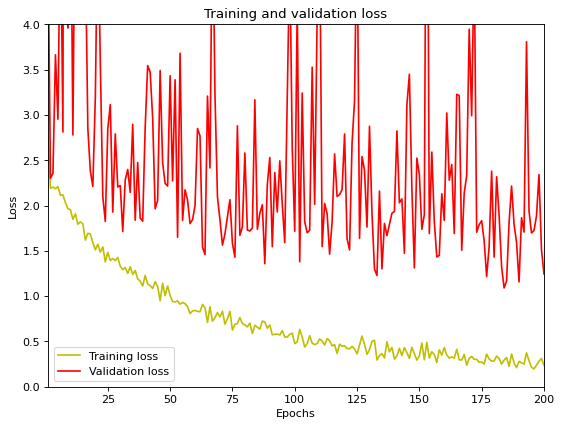

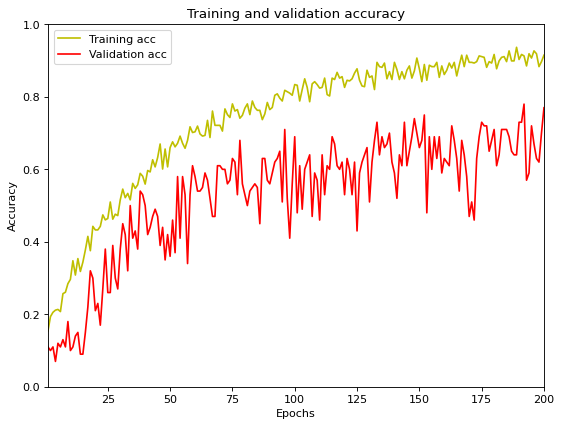

[0.15415020287036896, 0.19367589056491852, 0.20553359389305115, 0.21146245300769806, 0.2134387344121933, 0.2075098752975464, 0.25691699981689453, 0.260869562625885, 0.28458496928215027, 0.2964426875114441, 0.3478260934352875, 0.3083004057407379, 0.3537549376487732, 0.3181818127632141, 0.343873530626297, 0.37747034430503845, 0.4150197505950928, 0.3754940629005432, 0.4426877498626709, 0.4328063130378723, 0.4328063130378723, 0.4426877498626709, 0.4743083119392395, 0.46047431230545044, 0.4644268751144409, 0.5098814368247986, 0.4624505937099457, 0.47628459334373474, 0.47233203053474426, 0.5158102512359619, 0.5454545617103577, 0.52173912525177, 0.5335968136787415, 0.5158102512359619, 0.5612648129463196, 0.5474308133125305, 0.5573122501373291, 0.5889328122138977, 0.5810276865959167, 0.5592885613441467, 0.5968379378318787, 0.5928853750228882, 0.6264821887016296, 0.6067193746566772, 0.6324110627174377, 0.6699604988098145, 0.6007905006408691, 0.6561264991760254, 0.6067193746566772, 0.66007906198

In [29]:
from matplotlib.pyplot import figure
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
figure(figsize=(8, 6), dpi=80)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlim(1,200)
plt.ylim(0,4)
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
figure(figsize=(8, 6), dpi=80)
acc_att = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc_att, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.xlim(1,200)
plt.ylim(0,1)
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print(acc_att,'\n')




### This code would provide the Evaluvation Meterics for Attention Based Model
### The Confusion Matrix is displayed at the End

In [30]:
import numpy as np
import sklearn.metrics as metrics
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
predictions = model.predict(test_generator,test_steps_per_epoch)
# Get most likely class
predictions = np.argmax(predictions, axis=-1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())
report = metrics.classification_report(true_classes, predictions, target_names=class_labels)
print(report)
confusion_matrix = metrics.confusion_matrix(true_classes, predictions)  # shape=(12, 12)
print(confusion_matrix)

                           precision    recall  f1-score   support

       American_Goldfinch       1.00      0.90      0.95        10
             Barn_Swallow       0.64      0.90      0.75        10
                 Cardinal       0.91      1.00      0.95        10
            Cedar_Waxwing       0.77      1.00      0.87        10
                Fish_Crow       0.90      0.90      0.90        10
            Gray_Kingbird       0.50      0.90      0.64        10
             Tree_Swallow       0.67      0.40      0.50        10
       Western_Meadowlark       1.00      0.70      0.82        10
            White_Pelican       0.71      0.50      0.59        10
White_breasted_Kingfisher       1.00      0.50      0.67        10

                 accuracy                           0.77       100
                macro avg       0.81      0.77      0.76       100
             weighted avg       0.81      0.77      0.76       100

[[ 9  0  0  0  0  1  0  0  0  0]
 [ 0  9  0  0  0  1  0  0 

### Run the Following Cells for the Model Prediction Experimentation
### Experiment - 1

['American_Goldfinch', 'Barn_Swallow', 'Cardinal', 'Cedar_Waxwing', 'Fish_Crow', 'Gray_Kingbird', 'Tree_Swallow', 'Western_Meadowlark', 'White_Pelican', 'White_breasted_Kingfisher']
Cedar_Waxwing (0.973)
American_Goldfinch (0.0123)
Gray_Kingbird (0.0105)
White_breasted_Kingfisher (0.0034)
Fish_Crow (0.000223)
Tree_Swallow (5.58e-05)
Western_Meadowlark (4.34e-05)
White_Pelican (1.65e-05)
Cardinal (4.55e-06)
Barn_Swallow (3.11e-06)


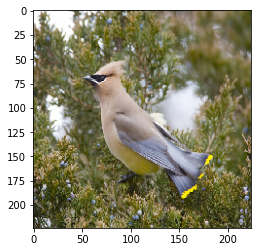

In [31]:
img = image.load_img('/content/drive/MyDrive/Colab Notebooks/DeepL-Birds/Test/Cedar_Waxwing/Cedar_Waxwingtest-2.jpg',target_size=(224,224,3))
img = image.img_to_array(img)
img = img/255

classes = class_labels
print(classes)
proba = model.predict(img.reshape(1,224,224,3))
top_10 = np.argsort(proba[0])[:-11:-1]
for i in range(10):
    print("{}".format(classes[top_10[i]])+" ({:.3})".format(proba[0][top_10[i]]))
plt.imshow(img)


### Experiment - 2

['American_Goldfinch', 'Barn_Swallow', 'Cardinal', 'Cedar_Waxwing', 'Fish_Crow', 'Gray_Kingbird', 'Tree_Swallow', 'Western_Meadowlark', 'White_Pelican', 'White_breasted_Kingfisher']
Cardinal (1.0)
White_breasted_Kingfisher (1.11e-05)
Barn_Swallow (5.24e-09)
Cedar_Waxwing (1.07e-13)
White_Pelican (2.53e-18)
American_Goldfinch (7.06e-19)
Western_Meadowlark (2.35e-19)
Gray_Kingbird (5.36e-22)
Tree_Swallow (5.24e-22)
Fish_Crow (1.06e-25)


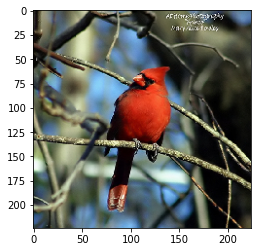

In [32]:
img = image.load_img('/content/drive/MyDrive/Colab Notebooks/DeepL-Birds/Test/Cardinal/Cardinal-7.jpg',target_size=(224,224,3))
img = image.img_to_array(img)
img = img/255

classes = class_labels
print(classes)
proba = model.predict(img.reshape(1,224,224,3))
top_10 = np.argsort(proba[0])[:-11:-1]
for i in range(10):
    print("{}".format(classes[top_10[i]])+" ({:.3})".format(proba[0][top_10[i]]))
plt.imshow(img)


### Experiment - 3

['American_Goldfinch', 'Barn_Swallow', 'Cardinal', 'Cedar_Waxwing', 'Fish_Crow', 'Gray_Kingbird', 'Tree_Swallow', 'Western_Meadowlark', 'White_Pelican', 'White_breasted_Kingfisher']
Barn_Swallow (0.999)
White_Pelican (0.000432)
Cardinal (0.00023)
Fish_Crow (7.14e-05)
Gray_Kingbird (1.39e-05)
Cedar_Waxwing (1.23e-05)
Tree_Swallow (3.73e-06)
White_breasted_Kingfisher (2.67e-06)
Western_Meadowlark (4.3e-07)
American_Goldfinch (1.69e-08)


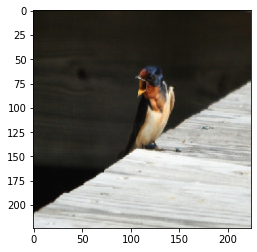

In [33]:
img = image.load_img('/content/drive/MyDrive/Colab Notebooks/DeepL-Birds/Test/Barn_Swallow/Barn_Swallowtest-4.jpg',target_size=(224,224,3))
img = image.img_to_array(img)
img = img/255

classes = class_labels
print(classes)
proba = model.predict(img.reshape(1,224,224,3))
top_10 = np.argsort(proba[0])[:-11:-1]
for i in range(10):
    print("{}".format(classes[top_10[i]])+" ({:.3})".format(proba[0][top_10[i]]))
plt.imshow(img)

### Run the block of Code to see the comaprison of ResNet vs Attention Based 
### ResNet Model on their respective training accuracy

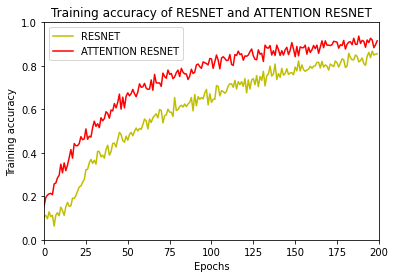

In [35]:
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
epochs = range(0, 200)
resnet_acc=acc
attention_resnet_acc=acc_att
plt.plot(epochs, resnet_acc, 'y', label='RESNET')
plt.plot(epochs, attention_resnet_acc, 'r', label='ATTENTION RESNET')
plt.xlim(0,200)
plt.ylim(0,1)
plt.title('Training accuracy of RESNET and ATTENTION RESNET')
plt.xlabel('Epochs')
plt.ylabel('Training accuracy')
plt.legend()
plt.show()